In [2]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import CCM as cfn
import LCE as lfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/domiHRnicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.4 (default, Aug 13 2019, 15:17:50) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Visualise Lorenz

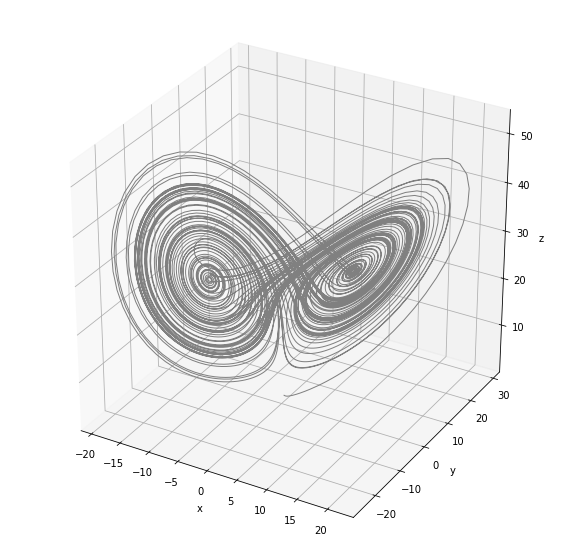

In [20]:
from mpl_toolkits.mplot3d import Axes3D

dt = 0.01
steps = 10000
sigma = 10
r = 28
b = 2.667
xs = np.empty(steps + 1)
ys = np.empty(steps + 1)
zs = np.empty(steps + 1)

# Set starting values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Calculate the partial derivatives at each t, then estimate t+1
for i in range(steps):
    x_d, y_d, z_d = lfn.Lorenz(xs[i], ys[i], zs[i], sigma, r, b)
    xs[i + 1] = xs[i] + (x_d * dt)
    ys[i + 1] = ys[i] + (y_d * dt)
    zs[i + 1] = zs[i] + (z_d * dt)


# Visualise
ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=1, c = 'grey')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

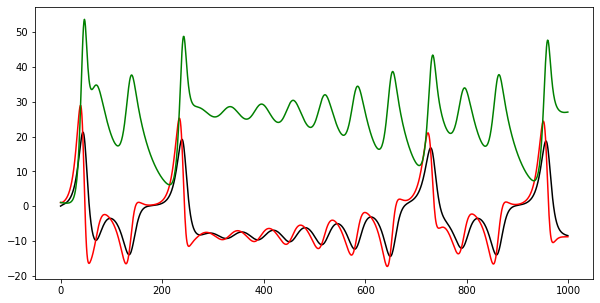

In [28]:
fig = plt.figure(figsize = (10,5))
plt.plot(xs[:1000], c = 'k')
plt.plot(ys[:1000], c = 'red')
plt.plot(zs[:1000], c = 'green')

In [32]:
#Find E and T, build embedding
tau, m = lfn.find_taum(xs, 10) #find tau and m
embed = lfn.takens_embed(m, tau, xs) #embed data



In [35]:
embed.shape

(9998, 3)

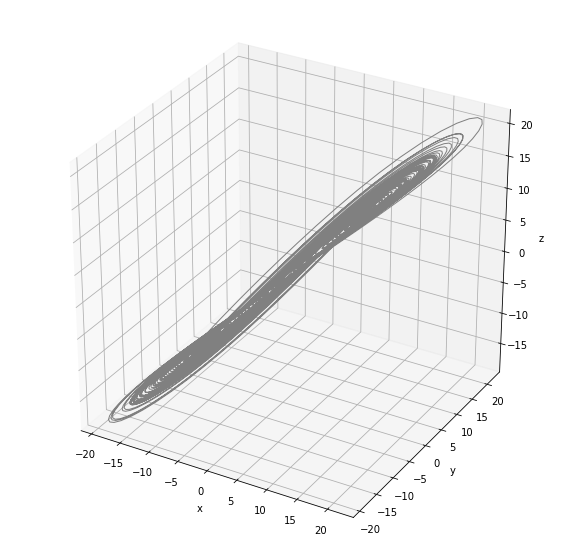

In [37]:

# Visualise
ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
ax.plot(embed[:,2], embed[:,1],embed[:,0], lw=1, c = 'grey')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [ ]:
#Find E+1 nearest neighbours for each point